In [32]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [33]:
#calculates the sigmoid value
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

#calculates the 2-norm of a vector x
def calculate_two_norm(x):
    return np.sqrt(np.sum(np.square(x)))

#calculates the label for the training set with probability based on sigmoid
def choose_label_y(xi,w):
    prob1=sigmoid(np.dot(xi,w.transpose()).item())
    yi=np.random.choice([0,1],1,p=[1-prob1, prob1])
    return yi

#generates the training set of the size specified
def generate_data(m):
    y=[] 
    mu,sigma=0,np.sqrt(1)
    
    w=np.random.normal(mu,sigma,size=(1,10)) #generating w vector of size 10 from a normal distribution N(0,1)
    
    w_magnitude=calculate_two_norm(w)
    w=w/w_magnitude #normalize w
    
    X=np.array(np.random.normal(mu,sigma,size=(m,10))) #generating X of size (m,10) from a normal distribution N(0,1)
    
    for i in range(m):
        y.extend(choose_label_y(X[i],w))  #generating the label vector
    return (X,y,w)

set_size=[50, 100, 150, 200]

#Generates data, trains the classifier over 1000 iterations for given sample size and calculates the average error rate
def logistic_regression():
    average_error_rate=[]
    for ss in set_size:
        error_rate=[]
        for i in range(10):
            (X,y,w)=generate_data(ss)
            clf = LogisticRegression(max_iter=1000).fit(X,y)
            w_new=clf.coef_
            error_rate.append(calculate_two_norm(w_new-w))
        average_error_rate.append(np.average(error_rate))
    plt.plot(set_size,average_error_rate,label='logistic regression')
    _=plt.xticks(set_size)
    print("The averaged 2-norm error rate = ",average_error_rate)
        
#Generates data, trains the classifier over 1000 iterations for given sample size and calculates the average error rate
def gradient_descent():
    average_error_rate=[]
    for ss in set_size:
        error_rate=[]
        for i in range(10):
            (X,y,w)=generate_data(ss)
            w_new=np.zeros(10) #initialize the w_new vector (predicted) to 0
            for iterator in range(1000):
                w_new=gradient(X,y,w_new,ss) #calculate the w_new value for 1000 iterations to fit the data
            error_rate.append(calculate_two_norm(w_new-w)) #calculate the error rate over 10 iterations
        average_error_rate.append(np.average(error_rate)) #average the error rate over the 10 iterations
    plt.plot(set_size,average_error_rate,label='gradient descent')
    _=plt.xticks(set_size)
    print("The averaged 2-norm error rate = ",average_error_rate)

#calculation of the gradient for the Gradient Descent algorithm
def gradient(X,y,w_old,m):
    w_new=[]
    eta=0.01 #step size
    gradient=0
    #calcute the gradient as per the formula specified below
    for i in range(m):
        w_transpose_x=np.dot(X[i],w_old.transpose()).item()
        sigmoid_quantity=sigmoid(w_transpose_x)
        gradient+=X[i]*(sigmoid_quantity-y[i])*(sigmoid_quantity**2)*np.exp(-1*w_transpose_x)
    gradient/=m #averaging the sum gradient
    w_new=w_old - eta*gradient #calculating the new w value 
    return w_new

#Generates data, trains the classifier over 1000 iterations for given sample size and calculates the average error rate
def stochastic_gradient_descent():
    average_error_rate=[]
    for ss in set_size:
        error_rate=[]
        for i in range(10):
            (X,y,w)=generate_data(ss)
            w_new=np.zeros(10) #initialize the w_new vector to zeroes
            for iterator in range(1000):
                w_new=stochastic_gradient(X,y,w_new,ss) 
            error_rate.append(calculate_two_norm(w_new-w))
        average_error_rate.append(np.average(error_rate))
    plt.plot(set_size,average_error_rate,label='stochastic gradient descent')
    plt.legend()
    plt.xlabel('Sampling points')
    plt.ylabel('2-norm error rates')
    _=plt.xticks(set_size)
    print("The averaged 2-norm error rate = ",average_error_rate)

#calculation of the gradient for the Stochastic Gradient Descent algorithm    
def stochastic_gradient(X,y,w_old,m):
    w_new=[]
    eta=0.01
    random_index=np.random.randint(0,m) #picking a random integer from [0,m-1] as an index for X matrix
    w_transpose_x=np.dot(X[random_index],w_old.transpose()).item()
    sigmoid_quantity=sigmoid(w_transpose_x)
    gradient=X[random_index]*(sigmoid_quantity-y[random_index])*(sigmoid_quantity**2)*np.exp(-1*w_transpose_x)
    w_new=w_old - eta*gradient
    return w_new

    

## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w - 
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

Logistic Regression
The averaged 2-norm error rate =  [1.03364333795739, 0.7891145925963124, 0.544438550075629, 0.46665446421255136]
Time taken for logistic regression is  0.7599999999999909

Gradient Descent
The averaged 2-norm error rate =  [0.7595362109588535, 0.6686944057120833, 0.6564178851870991, 0.6336696173914128]
Time taken for gradient descent is  103.16999999999996

Stochastic Gradient Descent
The averaged 2-norm error rate =  [0.7434031420277452, 0.7022920428811871, 0.6908603456246742, 0.6764574408146873]
Time taken for stochastic gradient descent is  1.6399999999999864



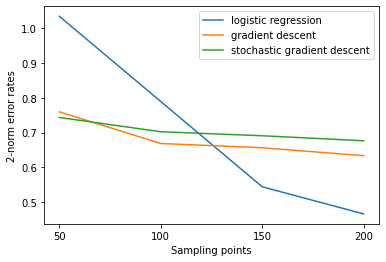

In [34]:
print("Logistic Regression")
start_time=time.clock()
logistic_regression()
logistic_regression_time=time.clock()-start_time
print("Time taken for logistic regression is ", logistic_regression_time)
print("================================\n")

print("Gradient Descent")
start_time=time.clock()
gradient_descent()
gradient_descent_time=time.clock()-start_time
print("Time taken for gradient descent is ", gradient_descent_time)
print("================================\n")

print("Stochastic Gradient Descent")
start_time=time.clock()
stochastic_gradient_descent()
stochastic_gradient_descent_time=time.clock()-start_time
print("Time taken for stochastic gradient descent is ", stochastic_gradient_descent_time)
print("================================\n")

## Formula used for Gradient calculation in Gradient Descent algorithm

$\triangledown(L(w)$) = $\frac{1}{m}*\sum_{1}^{m} x^i*(\sigma(w^Tx^i) - y^i)*(\sigma(w^Tx^i)^2)*e^{-w^Tx^i}$


# Problem 2

In [35]:
from sklearn import datasets
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [36]:
cancer = datasets.load_breast_cancer()

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.

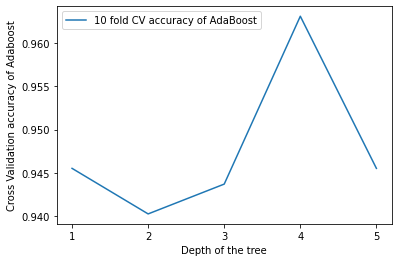

In [37]:
X,y = cancer.data, cancer.target
crossValidationAccuracy=[]
for depth in range(1,6):
    clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=depth,random_state=101), n_estimators=10, learning_rate=1,random_state=101)
    crossValidationAccuracy.append(cross_val_score(estimator=clf, X=cancer.data, y=cancer.target,cv=10).mean())
plt.plot(range(1,6),crossValidationAccuracy,label='10 fold CV accuracy of AdaBoost')
plt.xlabel('Depth of the tree')
plt.ylabel('Cross Validation accuracy of Adaboost')
_=plt.xticks(range(1,6))
plt.legend()